## **Aufgabe 3 - Leistung eines Laserstrahls**

Gegeben ist folgende Funktion

$$ f(x) = \frac{1}{4} x^3 - \frac{1}{2} x^2 - x + 3 $$

mit den Grenzen $x_\text{min} = 1$ und $x_\text{max} = 3$.

### **Teilaufgaben**

1. Stellen Sie die Funktion graphisch in ihren Grenzen dar.
2. Bestimmen Sie numerisch das Integral zwischen $1 \leq x \leq 3$ mit Hilfe der Funktion [`trapezoid`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapezoid.html) aus dem SciPi-Modul. Variieren Sie dabei die Anzahl an Stützstellen wie folgt: $[5, 20, 60]$. Wie verändert sich das Integral, wenn die Anzahl der Stützstellen größer wird?

============================================================================================================================
### **Implementierung**


Mit `numpy` erstellen wir Arrays und führen Berechnungen durch. `trapezoid` ermöglicht die numerische Integration mit der Trapezregel. Mit `matplotlib.pyplot` zeichnen wir Diagramme zur Visualisierung.

In [1]:
import numpy as np
from scipy.integrate import trapezoid
import matplotlib.pyplot as plt

#### Teilaufgabe 1: Funktion definieren und grafisch darstellen

Hier wird die Funktion (f(x) definiert und im Bereich von (x = 1) bis (x = 3) ausgewertet. Mit `np.linspace` werden 100 Punkte in diesem Bereich erstellt, und deren Funktionswerte werden in `y_plot` gespeichert.

In [2]:
def f(x):
    return (1/4)*x**3 - (1/2)*x**2 - x + 3
x_min, x_max = 1, 3
x_plot = np.linspace(x_min, x_max, 100)
y_plot = f(x_plot)

#### Darstellung der Funktion f(x) im Bereich [x_min, x_max]

Dieser Code erstellt eine Grafik der Funktion f(x) im Bereich von x_min = 1 bis x_max = 3. 

Die Funktion wird mit einer blauen Linie dargestellt. Zusätzlich markieren vertikale Linien x_min (rot) und x_max (grün) die Integrationsgrenzen. Zur besseren Darstellung wird (in einigen Codefragmenten) die LaTeX-Formatierung verwendet.

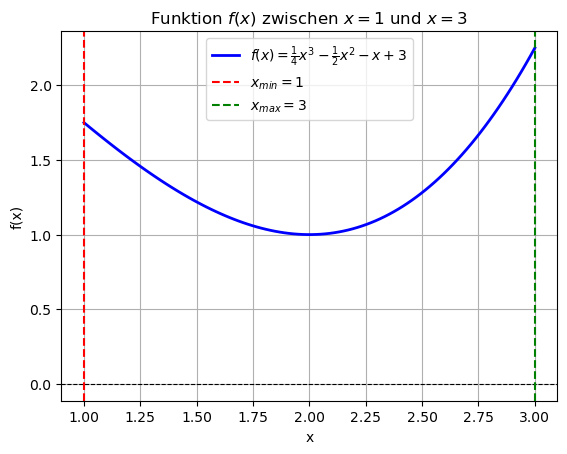

In [3]:
plt.figure()
plt.plot(x_plot, y_plot, label=r'$f(x) = \frac{1}{4}x^3 - \frac{1}{2}x^2 - x + 3$', color='blue', linewidth=2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Funktion $f(x)$ zwischen $x=1$ und $x=3$')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(x_min, color='red', linestyle='--', label='$x_{min}=1$')
plt.axvline(x_max, color='green', linestyle='--', label='$x_{max}=3$')
plt.legend()
plt.grid()
plt.show()

#### Teilaufgabe 2: Numerische Integration mit der Trapezregel

In diesem Abschnitt wird die numerische Integration der Funktion f(x) mit der Trapezregel durchgeführt. Die Anzahl der Stützstellen (n = 5, 20, 60) wird vorgegeben. Für jede Anzahl werden gleichmäßig verteilte (x)-Werte berechnet, deren Funktionswerte (y) ausgewertet und das Integral mit der Funktion `trapezoid` bestimmt. Die Ergebnisse werden im Dictionary `ergebnisse` gespeichert und in der Konsole ausgegeben.

In [4]:
stuetzstellen = [5, 20, 60]

ergebnisse = {}
for n in stuetzstellen:
    x = np.linspace(x_min, x_max, n)
    y = f(x)
    integral = trapezoid(y, x)
    ergebnisse[n] = integral
    print(f"Anzahl der Stützstellen: {n}, Integral: {integral:.5f}")

Anzahl der Stützstellen: 5, Integral: 2.75000
Anzahl der Stützstellen: 20, Integral: 2.67036
Anzahl der Stützstellen: 60, Integral: 2.66705


#### Teilaufgabe 2 (Visualisierung): Diagramme für verschiedene Stützstellen erstellen

Dieser Abschnitt zeigt die Funktion f(x), die Stützstellen (n = 5, 20, 60) und die angenäherte Fläche unter der Kurve. Die Punkte und die Flächen sind farblich hervorgehoben. Zur besseren Darstellung wird (in einigen Codefragmenten) die LaTeX-Formatierung verwendet.

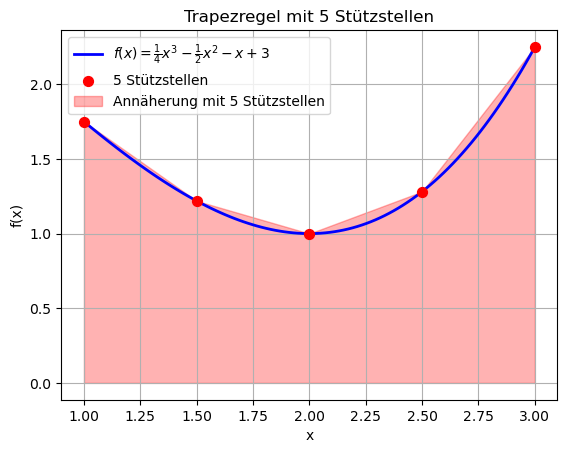

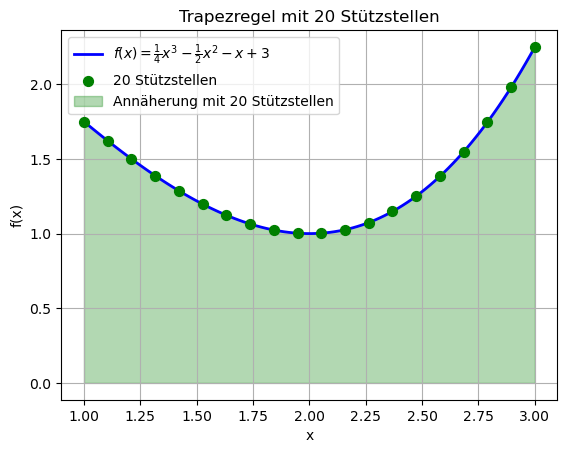

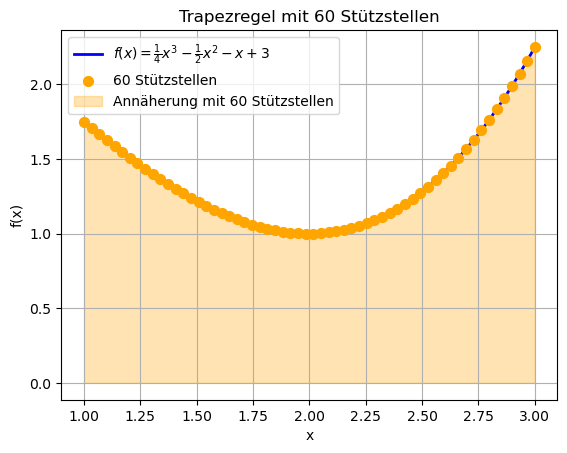

In [5]:
# Teilaufgabe 2 (Visualisierung): Diagramme für verschiedene Stützstellen erstellen
farben = ['red', 'green', 'orange']
for i, n in enumerate(stuetzstellen):
    x = np.linspace(x_min, x_max, n)
    y = f(x)

    # Darstellung der Funktion f(x) mit Stützstellen und angenäherter Fläche
    plt.figure()
    plt.plot(x_plot, y_plot, label=r'$f(x) = \frac{1}{4}x^3 - \frac{1}{2}x^2 - x + 3$', color='blue', linewidth=2)  
    plt.scatter(x, y, color=farben[i], label=f'{n} Stützstellen', zorder=5, s=50)
    plt.fill_between(x, y, alpha=0.3, color=farben[i], label=f'Annäherung mit {n} Stützstellen')
    
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f'Trapezregel mit {n} Stützstellen')
    plt.legend()
    plt.grid()
    plt.show()